<div style="text-align: center; font-size: 20px;"><b>Stats216v: Statistical Learning</b></div>

<br>
<div style="text-align: center">Stanford University</div>
<div style="text-align: center">Summer 2017</div>
<div style="text-align: center">Gyu-Ho Lee (<a href="mailto:gyuhox@gmail.com">gyuhox@gmail.com</a>)</div>

###### Q1.

Consider three curves, $\hat{g}_{1}$, $\hat{g}_{2}$ and $\hat{g}_{3}$, defined by

$\hat{g}_{1} = \arg\min_g\Biggl(\sum_{i=1}^n(y_i - g(x_i))^2 + \lambda\int[g^{''}(x)]^2dx\biggr),$

$\hat{g}_{2} = \arg\min_g\Biggl(\sum_{i=1}^n(y_i - g(x_i))^2 + \lambda\int[g^{(3)}(x)]^2dx\biggr),$

$\hat{g}_{3} = \arg\min_g\Biggl(\sum_{i=1}^n(y_i - g(x_i))^2 + \lambda\int[g^{(4)}(x)]^2dx\biggr),$

where $g^{(m)}$ represents the $m$th derivative of $g$.

(a) As $\lambda \rightarrow \infty$, which one among $\hat{g}_{1}$, $\hat{g}_{2}$ and $\hat{g}_{3}$ will have the smallest training RSS?

<span style="color:blue">
Gyu-Ho's Answer: $\hat{g}_{3}$ will have the smallest training RSS because $\hat{g}_{3} = cx^3 + dx^2 + ex + f$ is more flexible than $\hat{g}_{3} = cx^2 + dx + e$.
</span>

(b) As $\lambda \rightarrow \infty$, which one among $\hat{g}_{1}$, $\hat{g}_{2}$ and $\hat{g}_{3}$ will have the smallest test RSS?

<span style="color:blue">
Gyu-Ho's Answer: $\hat{g}_{1}$ will have the smallest test RSS, in case $\hat{g}_{3}$, *most flexible method*, may overfit the data.
</span>

(c) As $\lambda = 0$, will $\hat{g}_{1}$, $\hat{g}_{2}$ or $\hat{g}_{3}$ have the smaller training and test RSS?

<span style="color:blue">
Gyu-Ho's Answer: No, they all have same training and test RSS.
</span>

###### Q2.

Suppose that we carry out backward stepwise, forward stepwise, and best subset all on the same data set. Each approach will yield a sequence of models with $k = 0$ up through $k = p$ predictors.

(a) Which approach with $k$ predictors will have the smallest test residual sum of squares Explain.

<span style="color:blue">
Gyu-Ho's Answer: Best subset selection is most likely to show the smallest test RSS because it iterates all possible combinations of $k$ predictors. However, this is computationally expensive, and other methods can also choose the best model, by chance.
</span>

(b) Which approach with $k$ predictors will have the smallest training residual sum of squares? Explain.

<span style="color:blue">
Gyu-Ho's Answer: Best subset selection will have the smallest training RSS, because it selects the model with $k$ predictors of smallest training RSS out of all possible $\dbinom{p}{k}$ models. Forward stepwise selection chooses the model with smallest RSS out of $p-k$ models. Backward stepwise selection chooses the model with smallest RSS out of $k$ models. additional predictor.
</span>

(c) True or False:

i. The predictors in the $k$-variable model identified by forward stepwise are a subset of the predictors in the $(k + 1)$-variable model identified by backward stepwise selection.

<span style="color:blue">
Gyu-Ho's Answer: **False**. There is no direct relationship between forward selection model and backward selection model.
</span>

ii. The predictors in the $k$-variable model identified by backward stepwise are a subset of the predictors in the $(k + 1)$-variable model identified by forward stepwise selection.

<span style="color:blue">
Gyu-Ho's Answer: **False**. There is no direct relationship between forward selection model and backward selection model.
</span>

iii. The predictors in the $k$-variable model identified by best subset are a subset of the predictors in the $(k+1)$-variable model identified by best subset selection.

<span style="color:blue">
Gyu-Ho's Answer: **False**. Best selection model with $(k+1)$ predictors selects out of all possible models with $(k+1)$ predictors. Thus, $k$-variable best selection model might miss some variables from $(k+1)$-variable model.
</span>

iv. The predictors in the $k$-variable model identified by backward stepwise are a subset of the predictors in the $(k + 1)$-variable model identified by backward stepwise selection.

<span style="color:blue">
Gyu-Ho's Answer: **True**. Removing one predictor from $(k+1)$-variable model in backward stepwise selection gives $k$-variable model in backward stepwise selection.
</span>

v. The predictors in the $k$-variable model identified by forward stepwise are a subset of the predictors in the $(k + 1)$-variable model identified by forward stepwise selection.

<span style="color:blue">
Gyu-Ho's Answer: **True**. Adding one predictor to $k$-variable model in forward stepwise selection gives $(k+1)$-variable model in forward stepwise selection.
</span>

In [2]:
LoadLibraries = function() {
    library(MASS)
    install.packages("ISLR")
    library(ISLR)
    # TODO: needs JVM
    #install.packages("xlsx")
    #library(xlsx)
    library(boot)
    library(splines)
    library(reshape2)
    library(ggplot2)
    install.packages("pls")
    library(pls)
    library(glmnet)
    install.packages("tree")
    library(tree)
    install.packages("gbm")
    library(gbm)
    install.packages("randomForest")
    library(randomForest)
    print("Libraries have been loaded!")
}

LoadLibraries()

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: 'pls'

The following object is masked from 'package:stats':

    loadings

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:boot':

    aml

Loading required package: lattice

Attaching package: 'lattice'

The following object is masked from 'package:boot':

    melanoma

Loading required package: parallel
Loaded gbm 2.1.3
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The f

[1] "Libraries have been loaded!"


###### Q3.

This question uses the combined cycle power plant data set on Lichman, M. (2013). UCI Machine Learning Repository (http://archive.ics.uci.edu/ml). You can download the data set from the course website as “power_plants.csv”. Here we aim to use the “Exhaust vacuum” (V) predictor to predict the “Net hourly electrical energy output” (EP) of the 9568 power plants. A description of the data set can be found at http://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant.

In [3]:
# manually load first sheet of xlsx file
# pp = read.xlsx("hw-3-power-plan.xlsx", sheetIndex=1)
pp = read.csv("hw-3-power-plan-1.csv", header=TRUE)
attach(pp)

names(pp)
dim(pp)

# predict "EP" (Net hourly electrical energe output)
# based on variable "V" (Exhaust vacuum)
# T == temperature
# V == exhaust_vacuum
# AP == ambient_pressure
# RH == relative_humidity
# EP == energy_output

[1] "AT" "V"  "AP" "RH" "PE"

[1] 9568    5

(a) Denote $x$ as the Exhaust vacuum ($V$) and $y$ as the Net hourly electrical energy output ($EP$). Use the `poly()` function to fit a cubic polynomial regression to predict $y$ using $x$. Report the regression output, and plot the resulting data and polynomial fits.


Call:
lm(formula = y ~ poly(x, 3), data = pp)

Residuals:
    Min      1Q  Median      3Q     Max 
-40.529  -4.983  -0.160   5.251  38.418 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept)  4.544e+02  8.277e-02 5489.342   <2e-16 ***
poly(x, 3)1 -1.452e+03  8.096e+00 -179.333   <2e-16 ***
poly(x, 3)2  2.262e+02  8.096e+00   27.938   <2e-16 ***
poly(x, 3)3  1.995e+01  8.096e+00    2.465   0.0137 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 8.096 on 9564 degrees of freedom
Multiple R-squared:  0.775,	Adjusted R-squared:  0.775 
F-statistic: 1.098e+04 on 3 and 9564 DF,  p-value: < 2.2e-16


[1] 626945.8

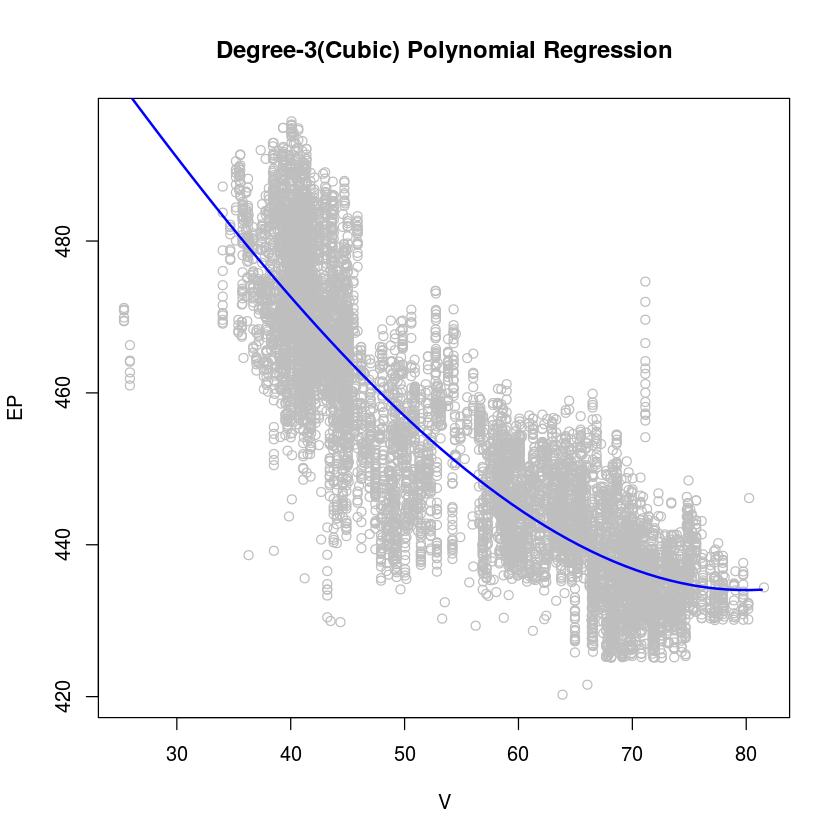

In [4]:
# train = sample(nrow(pp), size=floor(0.8*nrow(pp)))
# data.train = pp[train,]
# data.test = pp[-train,]
# fit.3 = lm(y~poly(x,3), data=data.train)
# pred.3 = predict(fit.3, newdata=data.test)

set.seed(2017)

x = V
y = PE

# fit a cubic polynomial regression to predict y
fit.3 = lm(y~poly(x,3), data=pp)
summary(fit.3)

# RSS
sum(fit.3$residuals^2)

# range of x axis
xlims = range(x)

# create a grid of x-axis points to predict
x.grid = seq(from=xlims[1], to=xlims[2])

# predict y for each point
pred.3 = predict(fit.3, newdata=list(x=x.grid), se=TRUE)

plot(x, y, main="Degree-3(Cubic) Polynomial Regression", xlab="V", ylab="EP", col="grey")
lines(x.grid, pred.3$fit, lwd=2, col="blue")

(b) Plot the polynomial fits for a polynomials of degree 1,3,7, and 10, and report the associated residual sum of squares.

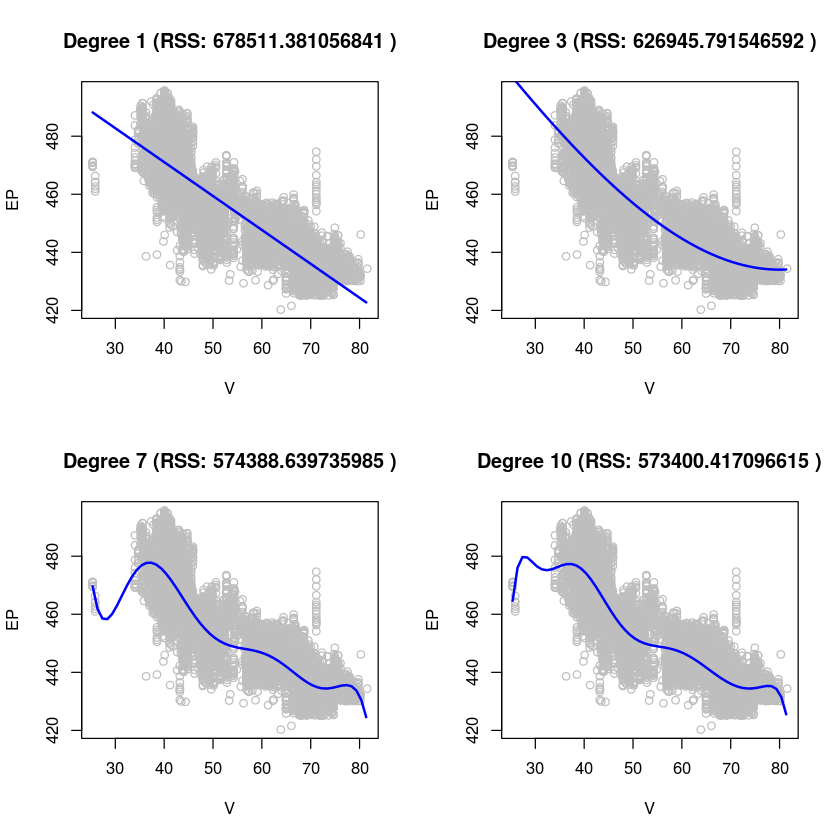

In [5]:
set.seed(2017)
x = V
y = PE

degrees = c(1,3,7,10)

par(mfrow=c(2,2))
for(deg in degrees) {
    fit = lm(y~poly(x,deg), data=pp)
    pred = predict(fit, newdata=list(x=x.grid), se=TRUE)
    RSS = sum(fit$residuals^2)
    plot(x, y, main=paste("Degree", deg, "(RSS:", RSS, ")"), xlab="V", ylab="EP", col="grey")
    lines(x.grid, pred$fit, lwd=2, col="blue")
}

(c) Perform cross-validation to select the optimal degree for the polynomial, and explain your results.

[1] 70.97608 65.62992 65.68998 64.21965 61.91549 61.70724 60.13853 60.14378
 [9] 60.05971 60.07296

[1] "Min CV Error at degree 9"


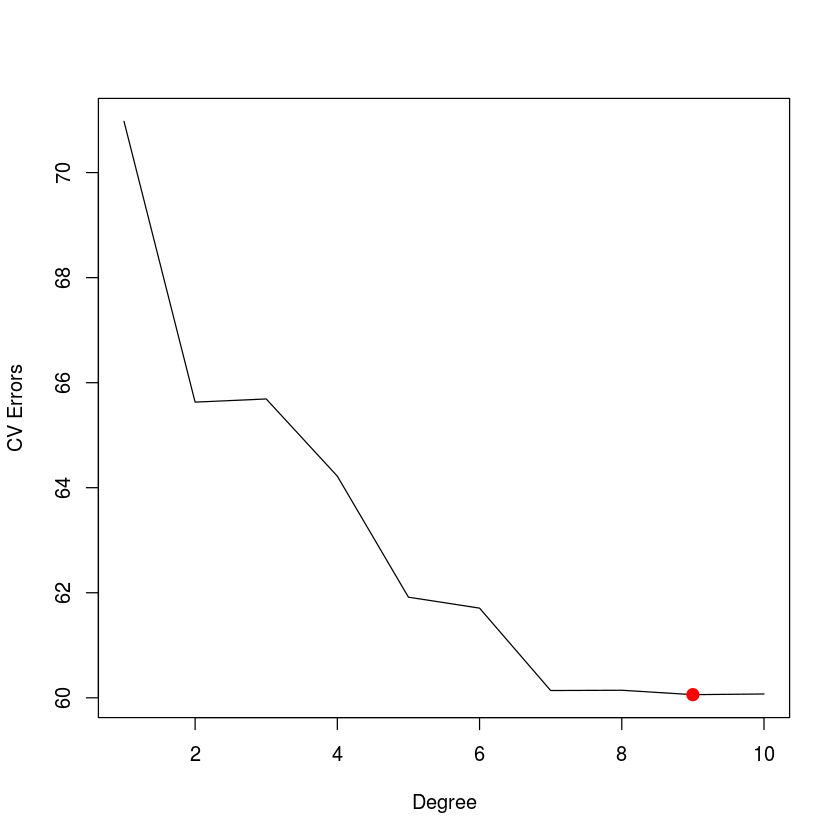

In [6]:
set.seed(2017)
x = V
y = PE

degrees = 1:10

# 10-fold Cross Validation
cv.error.10 = rep(0,10)
for(deg in degrees) {
    fit = glm(PE~poly(V,deg), data=pp)
    cv.error.10[deg] = cv.glm(pp, fit, K=10)$delta[1]
}
cv.error.10

plot(degrees, cv.error.10, xlab="Degree", ylab="CV Errors", type="l")
cv.min.10 = which.min(cv.error.10)
points(cv.min.10, cv.error.10[cv.min.10], col="red", cex=2, pch=20)
print(paste("Min CV Error at degree", degrees[cv.min.10]))

<span style="color:blue">
Gyu-Ho's Answer: Degree 9 has the lowest test MSE, thus 9 is the most optimal degree of polynomial. In addition, one can perform more iteration with different seeds to compute standard errors: if lower degrees range with one standard error, one can prefer lower degrees to degree 9.
</span>

(d) Use the `bs(x, df=4)` function to fit a regression spline to predict $EP$ using $V$. This will result in a spline with 5 of freedom when we include the intercept. Report the output for the fit. How did you choose the knots? Plot the resulting fit.

50% 
52.08

50% 
TRUE

numdf 
    4


Call:
lm(formula = y ~ bs(x, df = 4), data = pp)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.891  -5.080  -0.132   5.310  37.490 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)     475.896      1.917  248.23  < 2e-16 ***
bs(x, df = 4)1   17.647      2.454    7.19 6.98e-13 ***
bs(x, df = 4)2  -42.799      1.702  -25.15  < 2e-16 ***
bs(x, df = 4)3  -32.735      2.243  -14.59  < 2e-16 ***
bs(x, df = 4)4  -51.611      1.942  -26.57  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.975 on 9563 degrees of freedom
Multiple R-squared:  0.7817,	Adjusted R-squared:  0.7816 
F-statistic:  8562 on 4 and 9563 DF,  p-value: < 2.2e-16


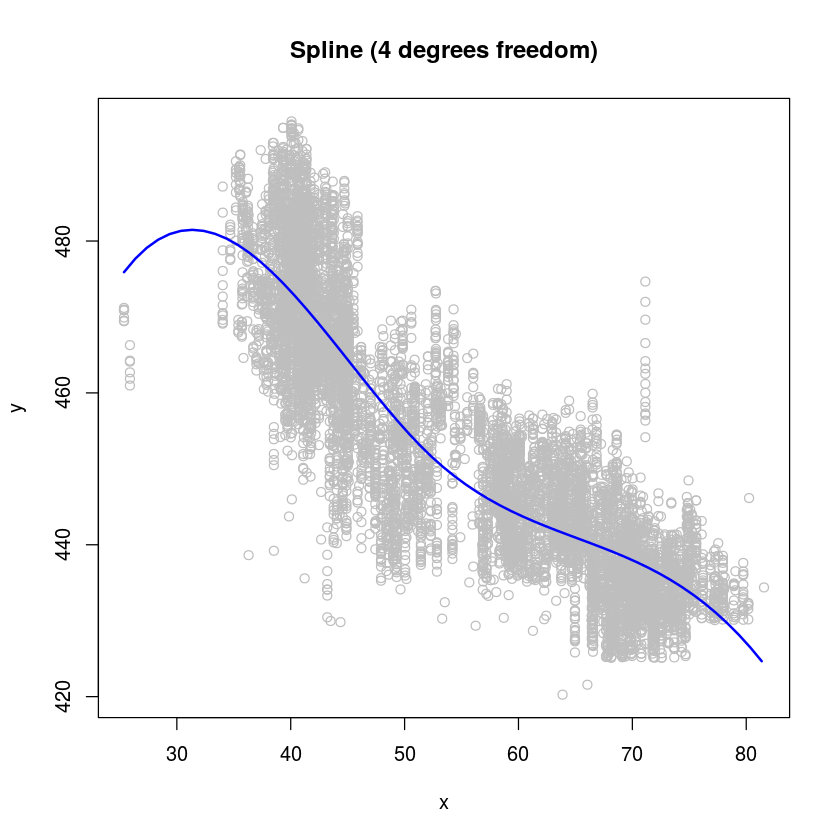

In [7]:
# fit regression spline
x = V
y = PE

# use 1-knot
attr(bs(x, df=4), "knots")

# verify that the 1-knot is located at median of x
median(x) == attr(bs(x, df=4), "knots")

# fit cubic spline models with 1-knot
fit1 = lm(y~bs(x, df=4), data=pp)

# degrees of freedom 4 (excluding intercept)
summary(fit1)$fstatistic[2]
summary(fit1)

preds = predict(fit1, newdata=list(x=x.grid), se=TRUE)

# plot our data points and the polynomial fit
plot(x, y, main="Spline (4 degrees freedom)", col="grey")
lines(x.grid, preds$fit, lwd=2, col="blue")

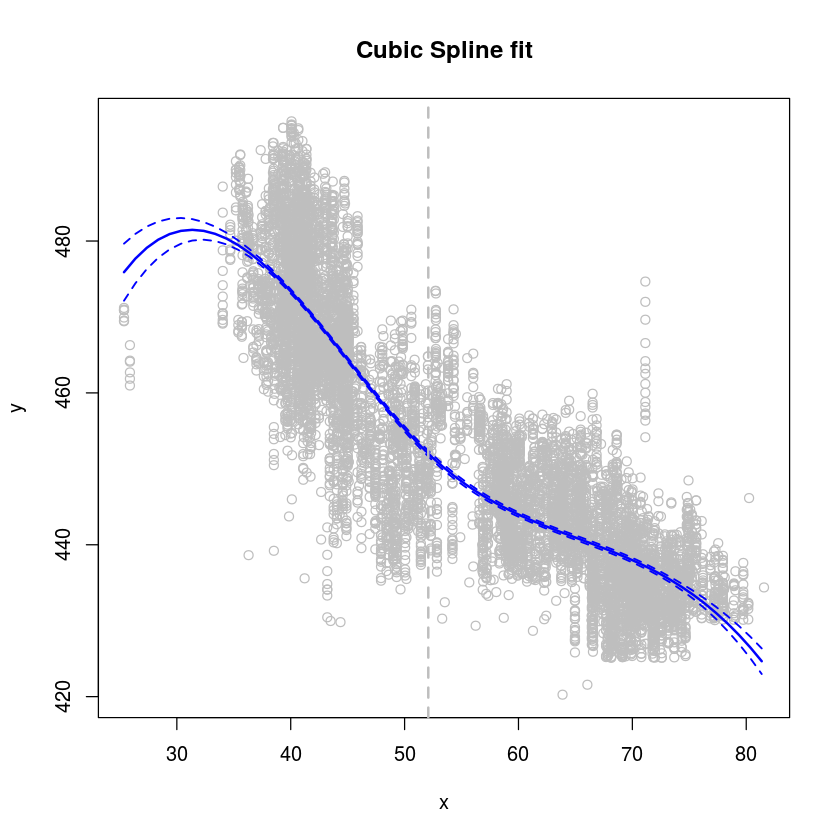

In [8]:
# show 95% confidence interval
plot(x, y, main="Cubic Spline fit", col="grey")
lines(x.grid, preds$fit, lwd=2, col="blue")
lines(x.grid, preds$fit+1.96*preds$se, lty="dashed", col="blue", lwd=1.5)
lines(x.grid, preds$fit-1.96*preds$se, lty="dashed", col="blue", lwd=1.5)
abline(v=attr(bs(x, df=4), "knots"), lty=2, lwd=2, col="grey")

(e) Now fit a regression spline for a range of degrees of freedom, and plot a few of the resulting fits and report the resulting RSS. Describe the results obtained.

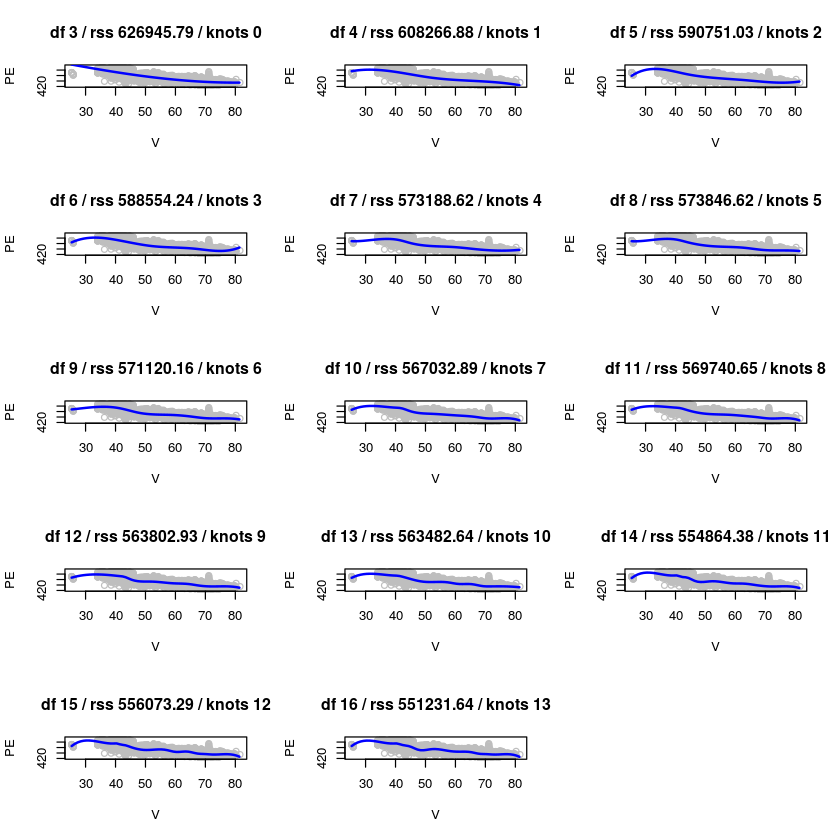

In [9]:
par(mfrow=c(5,3)) 

# plot regression splines from 3 to 16 degrees of freedom
rss = rep(0,16)
degrees = 3:16

for(deg in degrees) {
    fit = lm(y~bs(x, df=deg), data=pp)
    preds = predict(fit, newdata=list(x=x.grid), se=TRUE)
    rss[deg] = sum(fit$residuals^2)
    plot(x, y, col="grey", main=paste("df", deg, "/ rss", round(rss[deg],2), "/ knots", deg-3), xlab="V", ylab="PE")
    lines(x.grid, preds$fit, lwd=2, col="blue")
}

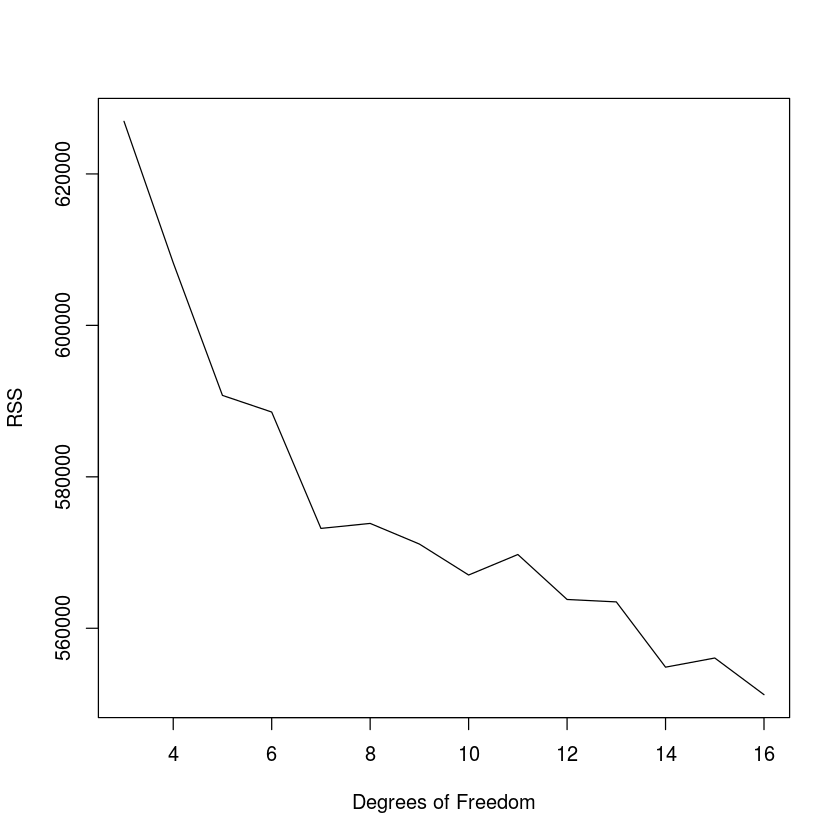

In [10]:
rss = rss[-c(1,2)]
plot(3:16, rss, xlab="Degrees of Freedom", ylab="RSS", type="l")

<span style="color:blue">
Gyu-Ho's Answer: RSS decreases until 7, and then slightly increases after that.
Again RSS decreases until 10, and then slightly increases after that.
Again RSS decreases until 14, and then slightly increases after that.
Again RSS decreases until 16.
</span>

(f) Perform cross-validation in order to select the best degrees of freedom for a regression spline. Plot the CV estimate of error versus the degrees of freedom. Describe your results.

In [11]:
set.seed(1)
x = V
y = PE

cv.error = rep(0,16)
degrees = 3:16

# 10-fold Cross Validation
for(deg in degrees) {
    fit = glm(PE~bs(V, df=deg), data=pp)
    cv.error[deg] = cv.glm(pp, fit, K=10)$delta[1]
}

cv.error = cv.error[-c(1,2)]

Warning message in bs(V, degree = 3L, knots = numeric(0), Boundary.knots = c(25.36, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(V, degree = 3L, knots = numeric(0), Boundary.knots = c(25.36, :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(V, degree = 3L, knots = structure(52.05, .Names = "50%"), :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(V, degree = 3L, knots = structure(52.05, .Names = "50%"), :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(V, degree = 3L, knots = structure(c(43.77, 62.96), .Names = c("33.33333%", :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(V, degree = 3L, knots = structure(c(43.77, 62.96), .Names = c("33.33333%", :
"some 'x' values beyond boundary knots may cause ill-conditioned bases"Warning message in bs(V, degree = 3L, kn

[1] "Min CV Error at degree 16"


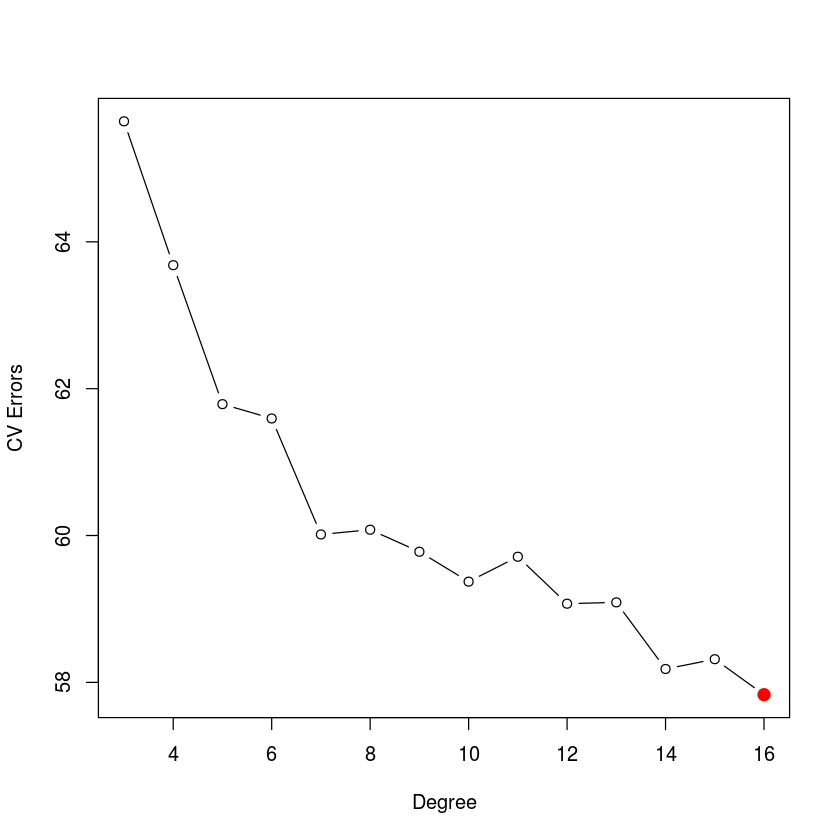

In [12]:
plot(degrees, cv.error, type="b", xlab="Degree", ylab="CV Errors")
cv.min = which.min(cv.error)
points(cv.min+2, cv.error[cv.min], col="red", cex=2, pch=20)
print(paste("Min CV Error at degree", degrees[cv.min]))

<span style="color:blue">
Gyu-Ho's Answer: Test MSE is minimum with 16 degrees of freedom.
</span>

###### Q4.

This problem works with the `body` dataset, which you can download from the homework folder on the class website. The goal of this problem is to perform and compare Principal Components Regression and Partial Least Squares on the problem of trying to predict someone’s weight. While you can use any R tools at your disposal to complete the problem, `library(pls)` and `Lab 3` from chapter 6 of ISLR will probably be very helpful, and the problem set was written with these approaches in mind. More information about this dataset can be found at
http://www.amstat.org/publications/jse/v11n2/datasets.heinz.html.

(a) Read the `body` dataset into R using the `load()` function. This dataset contains:

- X: A dataframe containing 21 different types of measurements on the human body.
- Y: A dataframe that contains the age, weight (kg), height (cm), and the biological sex of each person in the sample.

Let’s say we forgot how the binary variable sex is coded in this dataset. Using a simple visualization, explain how you can tell which sex is which.

In [13]:
# manually downloaded from https://github.com/cran/gclus/blob/master/data/body.RData
load("hw-3-body.RData")
head(body)
dim(body)

# age, weight, height, gender (out of 25 dims)
X = data.frame(body[,-c(22,23,24,25)])
Y = data.frame(body[,c(22,23,24,25)])
head(X)
head(Y)

Biacrom,Biiliac,Bitro,ChestDp,ChestD,ElbowD,WristD,KneeD,AnkleD,ShoulderG,⋯,BicepG,ForearmG,KneeG,CalfG,AnkleG,WristG,Age,Weight,Height,Gender
42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,,32.5,26.0,34.5,36.5,23.5,16.5,21,65.6,174.0,1
43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,,34.4,28.0,36.5,37.5,24.5,17.0,23,71.8,175.3,1
40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,,33.4,28.8,37.0,37.3,21.9,16.9,28,80.7,193.5,1
44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,,31.0,26.2,37.0,34.8,23.0,16.6,23,72.6,186.5,1
42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,,32.0,28.4,37.7,38.6,24.4,18.0,22,78.8,187.2,1
43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,,33.0,28.0,36.6,36.1,23.5,16.9,21,74.8,181.5,1


[1] 507  25

Biacrom,Biiliac,Bitro,ChestDp,ChestD,ElbowD,WristD,KneeD,AnkleD,ShoulderG,⋯,WaistG,AbdG,HipG,ThighG,BicepG,ForearmG,KneeG,CalfG,AnkleG,WristG
42.9,26.0,31.5,17.7,28.0,13.1,10.4,18.8,14.1,106.2,,71.5,74.5,93.5,51.5,32.5,26.0,34.5,36.5,23.5,16.5
43.7,28.5,33.5,16.9,30.8,14.0,11.8,20.6,15.1,110.5,,79.0,86.5,94.8,51.5,34.4,28.0,36.5,37.5,24.5,17.0
40.1,28.2,33.3,20.9,31.7,13.9,10.9,19.7,14.1,115.1,,83.2,82.9,95.0,57.3,33.4,28.8,37.0,37.3,21.9,16.9
44.3,29.9,34.0,18.4,28.2,13.9,11.2,20.9,15.0,104.5,,77.8,78.8,94.0,53.0,31.0,26.2,37.0,34.8,23.0,16.6
42.5,29.9,34.0,21.5,29.4,15.2,11.6,20.7,14.9,107.5,,80.0,82.5,98.5,55.4,32.0,28.4,37.7,38.6,24.4,18.0
43.3,27.0,31.5,19.6,31.3,14.0,11.5,18.8,13.9,119.8,,82.5,80.1,95.3,57.5,33.0,28.0,36.6,36.1,23.5,16.9


Age,Weight,Height,Gender
21,65.6,174.0,1
23,71.8,175.3,1
28,80.7,193.5,1
23,72.6,186.5,1
22,78.8,187.2,1
21,74.8,181.5,1


Gender,variable,value
1,Weight,65.6
1,Weight,71.8
1,Weight,80.7
1,Weight,72.6
1,Weight,78.8
1,Weight,74.8


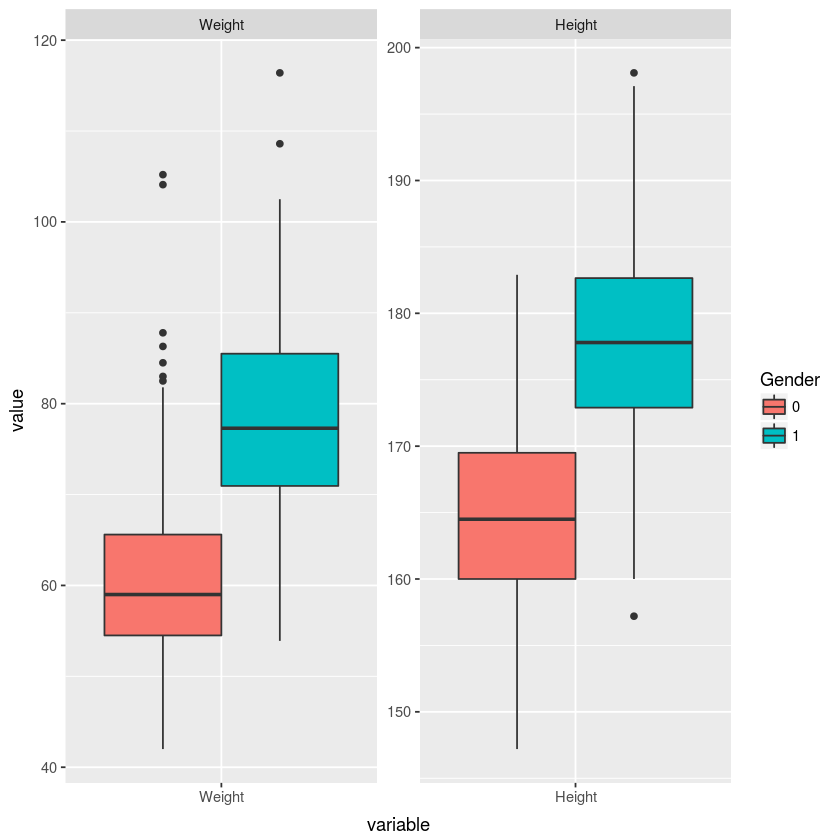

In [14]:
data.merged = melt(Y[,-1], id=c("Gender"))

# convert "Gender" column to factor
data.merged$Gender = as.factor(data.merged$Gender)
head(data.merged)

ggplot(data=data.merged, aes(x=variable, y=value)) +
    geom_boxplot(aes(fill=Gender)) +
    facet_wrap(~variable, scales="free")

<span style="color:blue">
Gyu-Ho's Answer: Therefore, gender with 1 has bigger weight and height. If data assume men are taller, gender 1 will be men, vice versa.
</span>

(b) Here we run `set.seed(2017)` in R. Reserve 200 observations from your dataset to act as a test set and use the remaining 307 as a training set. On the training set, use both `pcr` and `plsr` to fit models to predict a person’s weight based on the variables in X. Use the options `scale=TRUE` and `validation=‘CV’`. Why does it make sense to scale our variables in this case?

<span style="color:blue">
Gyu-Ho's Answer: It makes sense to scale variables because some variables have values in small scale, being ignored, but could have huge statistical siginificance. For instance, bone mass values are much smaller than chest diameter, but might have close relationship if scaled.
</span>

In [15]:
set.seed(2017)

# reserve 200 observations from your dataset to act as a test set
test = sort(sample(1:nrow(X),200))
train = (1:nrow(X))[-test]

In [16]:
data = as.data.frame(cbind(Y,X))

# remove age, height, gender to select variables in X
data = data[,-c(1,3,4)]

In [17]:
pcr.fit = pcr(Weight~.,
              data=data,
              subset=train,
              scale=TRUE,
              validation="CV")

plsr.fit = plsr(Weight~.,
                data=data,
                subset=train,
                scale=TRUE,
                validation = "CV")

(c) Run `summary()` on each of the objects calculated above, and compare the `training % variance` explained from the `pcr` output to the `plsr` output. Do you notice any consistent patterns (in comparing the two)? Is that pattern surprising? Explain why or why not.

In [18]:
summary(pcr.fit)

Data: 	X dimension: 307 21 
	Y dimension: 307 1
Fit method: svdpc
Number of components considered: 21

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           13.61    3.379    3.238    3.185    3.024    3.020    3.026
adjCV        13.61    3.377    3.237    3.177    3.020    3.017    3.022
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       3.033    3.029    3.023     2.959     2.977     2.961     2.918
adjCV    3.029    3.030    3.019     2.953     2.970     2.954     2.909
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        2.949     2.946     2.844     2.836     2.841     2.833     2.843
adjCV     2.940     2.937     2.833     2.825     2.830     2.822     2.832
       21 comps
CV        2.849
adjCV     2.838

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X         64

In [19]:
summary(plsr.fit)

Data: 	X dimension: 307 21 
	Y dimension: 307 1
Fit method: kernelpls
Number of components considered: 21

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           13.61    3.324    3.040    2.935    2.890    2.878    2.857
adjCV        13.61    3.322    3.036    2.930    2.877    2.866    2.847
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       2.864    2.870    2.872     2.877     2.877     2.878     2.879
adjCV    2.852    2.857    2.860     2.864     2.864     2.865     2.865
       14 comps  15 comps  16 comps  17 comps  18 comps  19 comps  20 comps
CV        2.879     2.879     2.879     2.878     2.878     2.878     2.878
adjCV     2.865     2.865     2.865     2.865     2.865     2.865     2.865
       21 comps
CV        2.878
adjCV     2.865

TRAINING: % variance explained
        1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps  8 comps
X       

<span style="color:blue">
Gyu-Ho's Answer: Two methods are similar, while PCR output explains more of variance in predictors in X and PLSR explains more variance in the reponse Weight. And this is not a surprising result. Both methods are designed to handle a large number of predictors, where they are collinear. Both construct new predictor variables, *components*, thus they are expected to show similar outputs. PCR does not consider the response variable, *Weight*, at all, therefore it is expected that PCR more explains the variance in predictors, while PSRL considers the response variable, thus explains more variance in response variable.
</span>

(d) For each of the models, pick a number of components that you would use to predict future values of weight from $X$. Please include any further analysis you use to decide on the number of components.

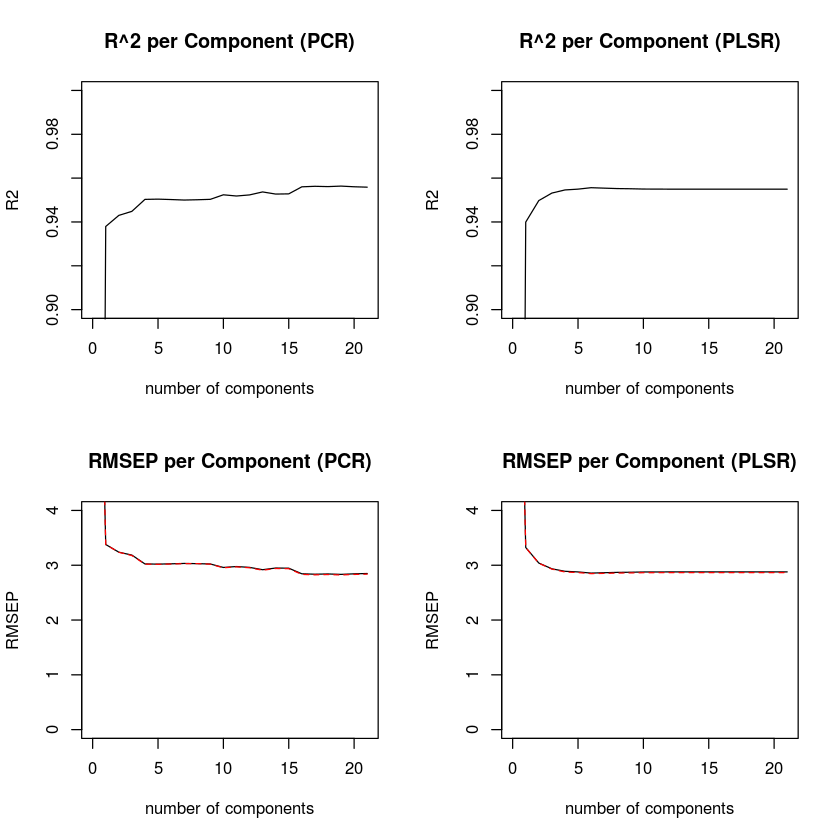

In [20]:
par(mfrow=c(2,2))

plot(R2(pcr.fit), ylim=c(.9,1), main="R^2 per Component (PCR)")
plot(R2(plsr.fit), ylim=c(.9,1), main="R^2 per Component (PLSR)")

# Root Mean Square Error of Prediction
plot(RMSEP(pcr.fit), ylim=c(0,4), main="RMSEP per Component (PCR)")
plot(RMSEP(plsr.fit), ylim=c(0,4), main="RMSEP per Component (PLSR)")

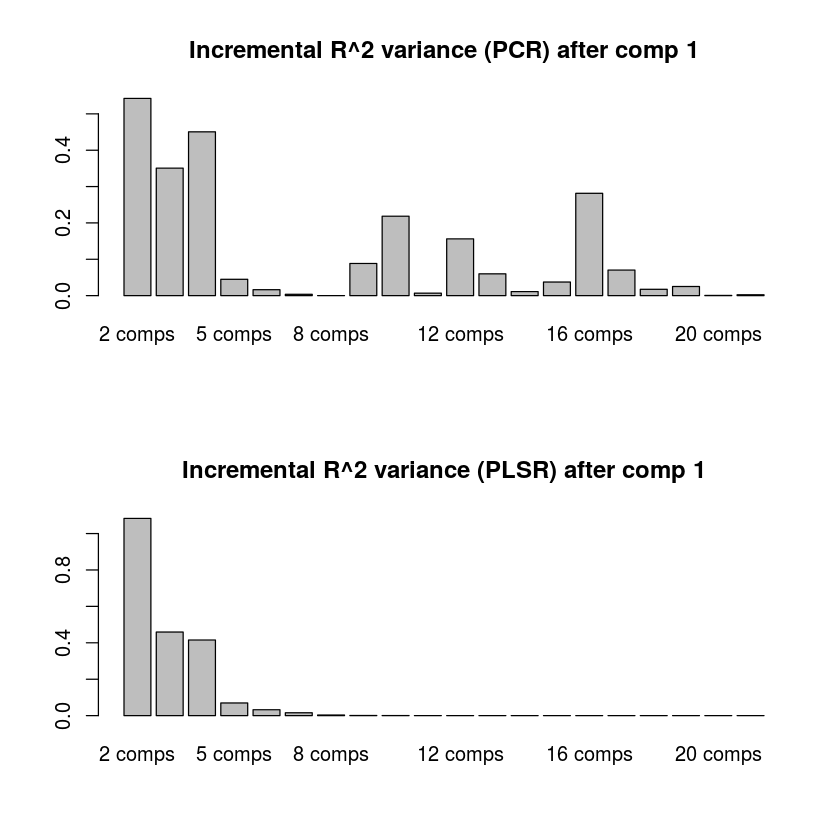

In [21]:
# incremental variance as we add a component (after first component)
pcr.comps = 100 * drop(R2(pcr.fit, estimate="train", intercept=FALSE)$val)
plsr.comps = 100 * drop(R2(plsr.fit, estimate="train", intercept=FALSE)$val)

par(mfrow=c(2,1))
barplot(diff(pcr.comps), main="Incremental R^2 variance (PCR) after comp 1")
barplot(diff(plsr.comps), main="Incremental R^2 variance (PLSR) after comp 1")

<span style="color:blue">
Gyu-Ho's Answer: For PCR, choose first 5 components because the bar chart shows second, third, and fourth components already explain almost 1% of the variance. For PLSR, choose 3 components because the bar chart shows second component already explains 1% of the variance.
</span>

(e) Practically speaking, it might be nice if we could guess a person’s weight without measuring 21 different quantities. Do either of the methods performed above allow us to do that? If not, pick another method that will, and fit it on the training data.

<span style="color:blue">
Gyu-Ho's Answer: None of those methods is useful for predicting a person's weight because PCR and PLSR still keep the same number of predictors in the model, thus hard to interpret. To reduce the number of predictors with better interpretability, I will try **lasso**.
</span>

In [22]:
data.x = scale(model.matrix(body$Weight~.,body))[,-c(1,23,24,25)]
data.y = body$Weight

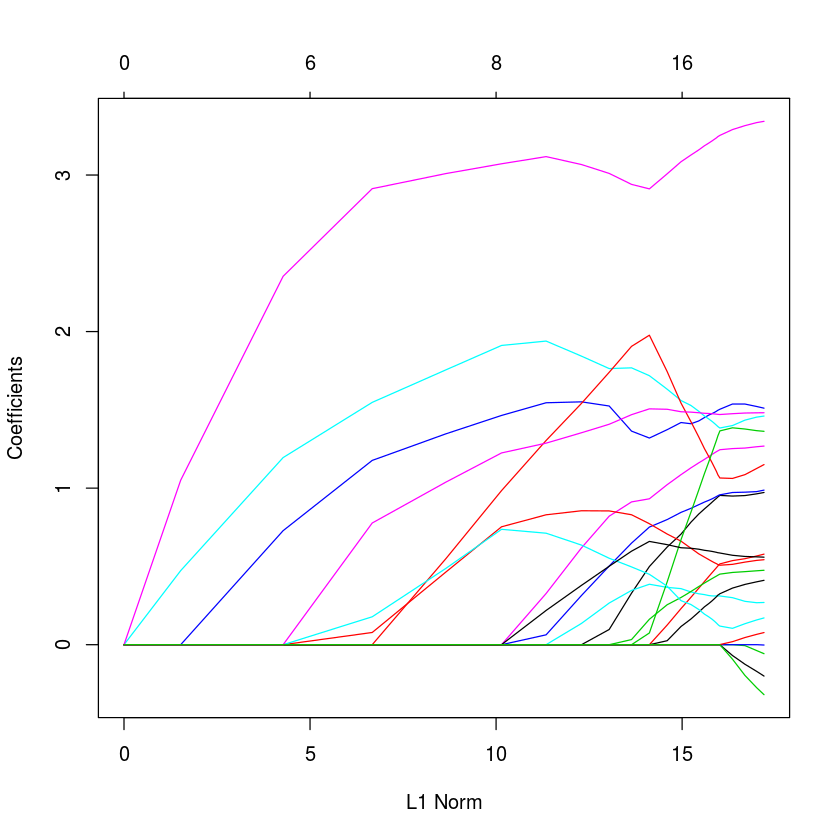

In [23]:
grid = 10^seq(10, -2, length=100)
lasso.mod = glmnet(data.x[train,], data.y[train], alpha=1, lambda=grid)
plot(lasso.mod)

In [24]:
set.seed(2017)

lasso.cv = cv.glmnet(data.x[train,], data.y[train], alpha=1)
bestlam = lasso.cv$lambda.min
lasso.pred = predict(lasso.mod, type="coefficients", s=bestlam)
lasso.pred

22 x 1 sparse Matrix of class "dgCMatrix"
                     1
(Intercept) 69.1288725
Biacrom      0.9399852
Biiliac      0.4983432
Bitro        .        
ChestDp      0.9492330
ChestD       0.3110600
ElbowD       1.2360545
WristD       0.3123007
KneeD        0.5142133
AnkleD       0.4414672
ShoulderG    1.4948023
ChestG       1.3969249
WaistG       3.2421054
AbdG         .        
HipG         1.0939095
ThighG       1.3222017
BicepG       .        
ForearmG     0.1325311
KneeG        1.4716982
CalfG        0.5884442
AnkleG       .        
WristG       .        

(f) Compare all 3 methods in terms of performance on the test set. Keep in mind that you should only run one version of each model on the test set. Any necessary selection of parameters should be done only with the training set.

In [25]:
# PCR
pcr.pred = predict(pcr.fit, data[test,], ncomp=5)
mean((pcr.pred - data.y[test])^2)

[1] 7.731277

In [26]:
# PLSR
plsr.pred = predict(plsr.fit, data[test,], ncomp=5)
mean((plsr.pred - data.y[test])^2)

[1] 7.896091

In [27]:
# Lasso
lasso.pred = predict(lasso.mod, s=bestlam, newx=data.x[test,])
mean((lasso.pred - data.y[test])^2)

[1] 7.577223

<span style="color:blue">
Gyu-Ho's Answer: **Lasso** shows the lowest test MSE. In addition, **Lasso** reduces unnecessary variables.
</span>

###### Q5.

This question uses the ALS dataset. In Problem Set 1, we saw that plain linear regression did not perform too well on this problem, and in Problem Set 2 we were able to lower the `RMSE` by using a lasso fit. Still, we were working in a linear regression context. In this exercise, we tackle the problem via non-linear regression trees. Note: because of the size of this dataset, some of the commands may take a couple of seconds to run.

In [28]:
loaded = load("hw-1-als.RData")
head(loaded) # 'train.X' 'train.y' 'test.X' 'test.y'

rData = get(loaded)
head(rData)

ls() # 'Elite' 'college' 'isfar' 'loaded' 'op' 'rData' 'test.X' 'test.y' 'train.X' 'train.y'
head(test.X)

[1] "train.X" "train.y" "test.X"  "test.y"

Onset.Delta,Symptom.Speech,Symptom.WEAKNESS,Site.of.Onset.Onset..Bulbar,Site.of.Onset.Onset..Limb,Race...Caucasian,Age,Sex.Female,Sex.Male,Mother,⋯,max.slope.bp.systolic,min.slope.bp.systolic,last.slope.bp.systolic,mean.slope.bp.systolic,num.slope.bp.systolic.visits,sum.slope.bp.systolic,first.slope.bp.systolic.date,meansquares.slope.bp.systolic,sd.slope.bp.systolic,slope.bp.systolic.slope
-341,1,1,1,0,1,48,0,0,0,,4.198161,-4.475980,-4.475980,-1.36080094,3,-4.0824028,16.0,17.37794,3.940325,-0.3295982
-1768,0,1,0,1,1,63,1,0,0,,17.392381,-65.221429,17.392381,-17.60978571,4,-70.4391429,7.0,1266.88652,30.931892,29.9343926
-334,1,0,1,0,1,36,0,0,0,,18.446465,-6.297241,18.446465,3.26931374,3,9.8079412,14.5,128.46964,10.852706,13.2125602
-268,0,1,0,1,1,55,0,1,0,,16.601818,-6.522143,0.000000,2.08510931,4,8.3404372,5.5,80.29592,8.714828,-6.1248970
-440,0,1,0,1,1,37,0,0,0,,9.223232,-10.145556,9.223232,-1.79943454,3,-5.3983036,17.0,69.34490,8.130617,6.5662736
-773,0,1,0,1,1,68,1,0,0,,23.412821,-13.834848,-9.223232,0.08868493,4,0.3547397,6.5,206.15780,14.357922,-12.2633662


[1] "LoadLibraries" "RSS"           "X"             "Y"            
 [5] "bestlam"       "body"          "cv.error"      "cv.error.10"  
 [9] "cv.min"        "cv.min.10"     "data"          "data.merged"  
[13] "data.x"        "data.y"        "deg"           "degrees"      
[17] "fit"           "fit.3"         "fit1"          "grid"         
[21] "lasso.cv"      "lasso.mod"     "lasso.pred"    "loaded"       
[25] "pcr.comps"     "pcr.fit"       "pcr.pred"      "plsr.comps"   
[29] "plsr.fit"      "plsr.pred"     "pp"            "pred"         
[33] "pred.3"        "preds"         "rData"         "rss"          
[37] "test"          "test.X"        "test.y"        "train"        
[41] "train.X"       "train.y"       "x"             "x.grid"       
[45] "xlims"         "y"

Onset.Delta,Symptom.Speech,Symptom.WEAKNESS,Site.of.Onset.Onset..Bulbar,Site.of.Onset.Onset..Limb,Race...Caucasian,Age,Sex.Female,Sex.Male,Mother,⋯,max.slope.bp.systolic,min.slope.bp.systolic,last.slope.bp.systolic,mean.slope.bp.systolic,num.slope.bp.systolic.visits,sum.slope.bp.systolic,first.slope.bp.systolic.date,meansquares.slope.bp.systolic,sd.slope.bp.systolic,slope.bp.systolic.slope
-1181,1,0,1,0,1,38,0,0,0,,0.981828,-8.300909,0.000000,-2.4396937,3,-7.3190811,5.5,23.28969,4.163843,5.003010
-1324,0,1,0,1,1,72,0,0,0,,0.000000,-9.818280,-9.818280,-4.9091398,2,-9.8182796,18.0,48.19931,4.909140,-8.920469
-1061,0,0,0,1,1,46,0,1,0,,6.522143,-5.533939,6.522143,0.4941017,2,0.9882035,11.0,36.58142,6.028041,14.677878
-1736,0,1,0,1,1,66,0,0,1,,55.800556,-87.928148,10.145556,-8.6064679,7,-60.2452751,4.5,1842.17436,42.048818,41.458842
-354,1,0,1,0,1,70,0,0,0,,6.917424,-10.870238,6.917424,-1.3176046,3,-3.9528139,6.0,55.33761,7.321307,3.759702
-500,1,1,1,0,1,37,0,0,0,,19.566429,-9.223232,0.000000,3.4477321,3,10.3431962,14.0,155.97105,12.003507,-9.605433


(a) Using the `tree` package, fit a decision tree to our training data. Call your object `full.tree.model` and print its summary.

In [29]:
# lm(train.y~., data=train.X)
full.tree.model = tree(train.y~., train.X)
summary(full.tree.model)


Regression tree:
tree(formula = train.y ~ ., data = train.X)
Variables actually used in tree construction:
 [1] "Onset.Delta"            "last.alsfrs.score"      "mean.climbing.stairs"  
 [4] "alsfrs.score.slope"     "max.slope.salivation"   "last.slope.weight"     
 [7] "min.slope.alsfrs.score" "sd.slope.alsfrs.score"  "slope.fvc.liters.slope"
[10] "last.slope.fvc.liters" 
Number of terminal nodes:  13 
Residual mean deviance:  0.2264 = 268 / 1184 
Distribution of residuals:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-1.9920 -0.2619  0.0560  0.0000  0.3336  1.8380 

(b) Plot your tree.

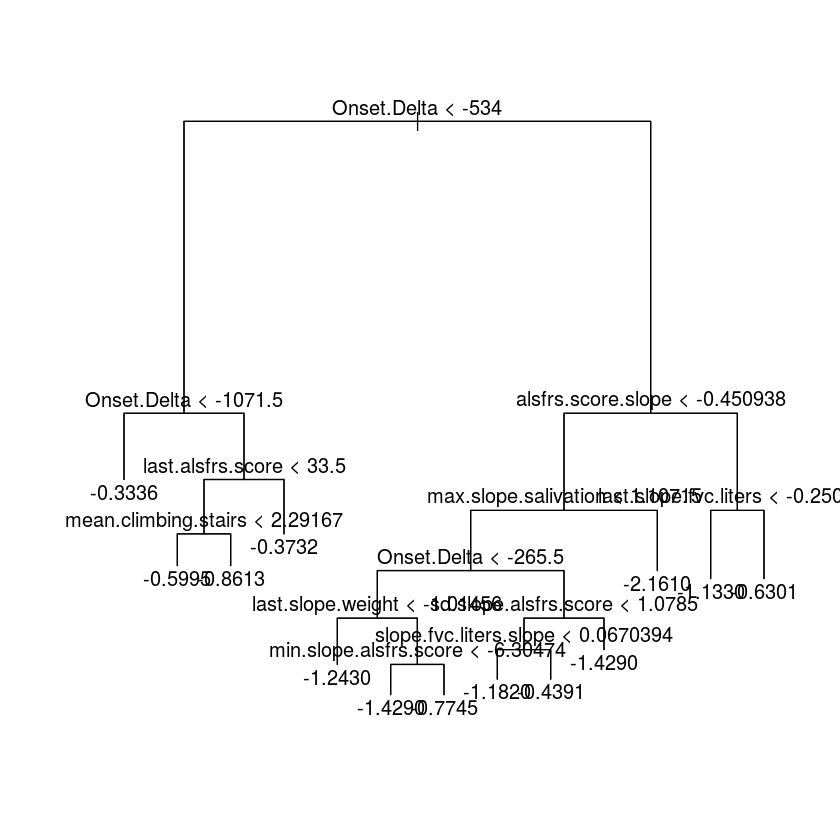

In [30]:
plot(full.tree.model)
text(full.tree.model, pretty=0)

(c) Now let us prune this tree. Set `seed(2017)`, and evaluate the CV error of the pruned trees by using the `cv.tree` command. Store the result of cv.tree on an object called `tree.cv`.

In [31]:
set.seed(2017)

# prune tree
tree.cv = cv.tree(full.tree.model)
tree.cv

$size
 [1] 13 12 11 10  9  8  7  6  5  4  3  2  1

$dev
 [1] 395.5904 386.4387 383.8729 379.9473 380.0191 364.6576 364.4981 366.0552
 [9] 363.1522 361.5754 361.5754 354.8793 383.5376

$k
 [1]      -Inf  3.937314  4.026019  4.191606  4.219921  6.169629  6.336111
 [8]  7.244820  8.013996  8.820664  9.086805 12.938685 38.887595

$method
[1] "deviance"

attr(,"class")
[1] "prune"         "tree.sequence"

(d) Plot it by typing `plot(tree.cv$size, tree.cv$dev, type=’b’)`. Here, `dev` is short for deviance, which can be roughly interpreted as the sum of squared error.

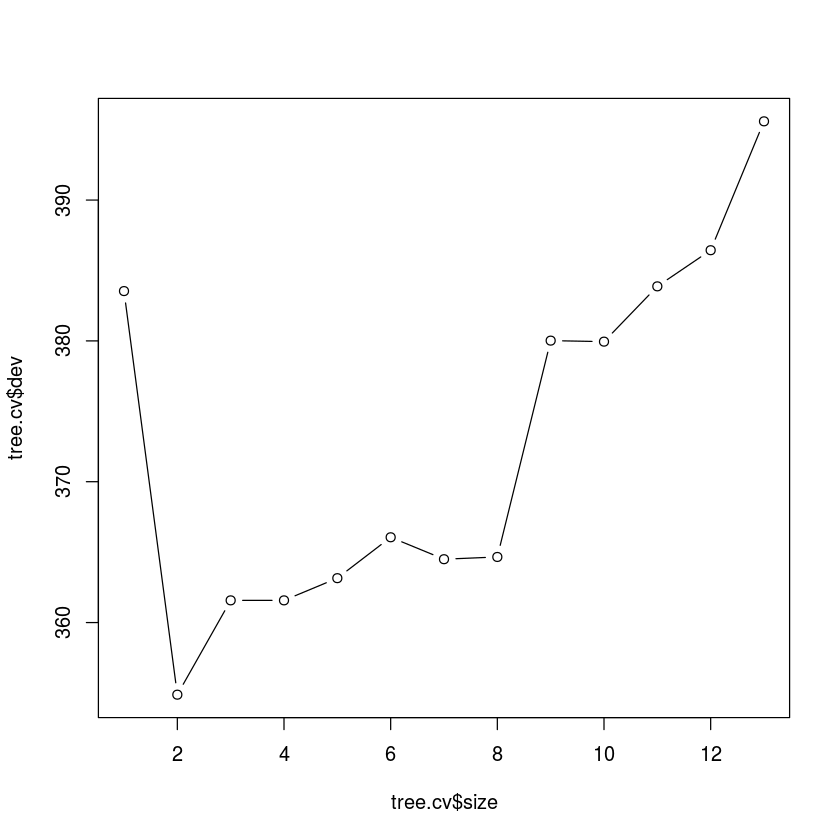

In [32]:
plot(tree.cv$size, tree.cv$dev, type='b')

(e) Identify the pruned tree with smallest CV error. Plot it.

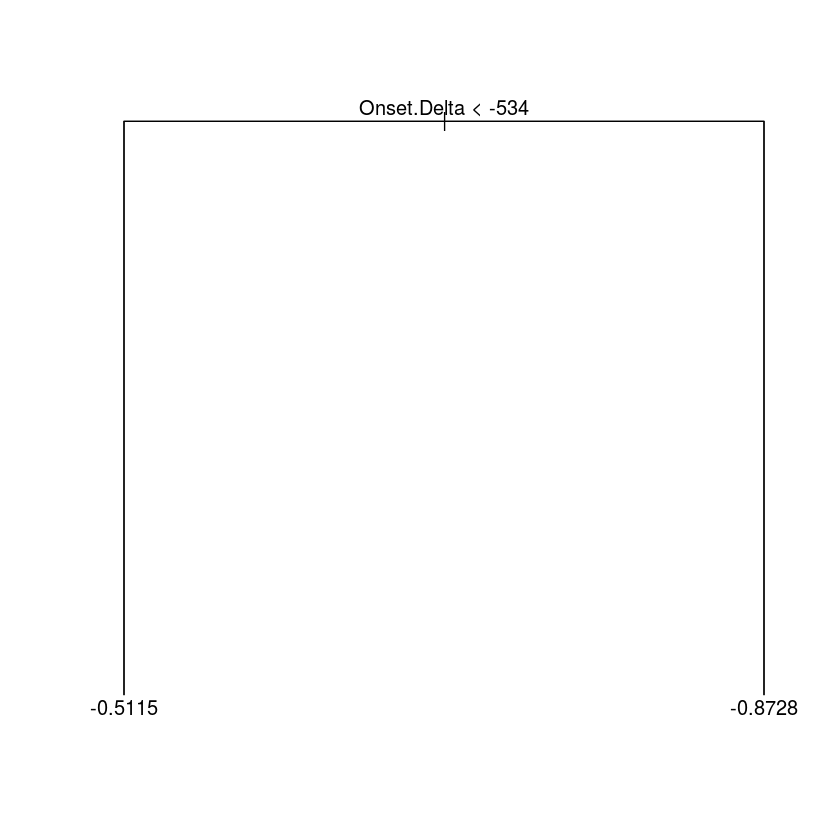

In [33]:
full.tree.pruned = prune.tree(full.tree.model, best=2)
plot(full.tree.pruned)
text(full.tree.pruned, pretty=0)

(f) Compute the `RMSE` of the full tree and the pruned tree. Which fares better? How does the Lasso (from Problem Set 2) compare to these methods?

In [34]:
yhat.full = predict(full.tree.model, newdata=test.X)
sqrt(mean((yhat.full-test.y)^2))

[1] 0.5722734

In [35]:
yhat.pruned = predict(full.tree.pruned, newdata=test.X)
sqrt(mean((yhat.pruned-test.y)^2))

[1] 0.543212

In [36]:
# lasso.test.pred = predict(lasso.cv, as.matrix(test.X), s='lambda.1se')
# sqrt(mean((lasso.test.pred - test.y)^2))
# 0.526945706527386

<span style="color:blue">
Gyu-Ho's Answer: **Lasso** shows the lowest RMSE. **Lasso** is different than tree-method methods, in that it does variable selection.
</span>

(g) We know that in general we can improve the performance of decision trees via boosting. Set `set.seed(2017)` and fit a boosted tree to the training data via the gbm command in the gbm package, and call it `gbm.model`. Use the options `distribution="gaussian"`, `n.trees=1700`, `shrinkage=0.01`, `cv.folds=5`, and print your model.

In [37]:
set.seed(2017)

gbm.model = gbm(train.y~., data=train.X, distribution="gaussian", n.trees=1700, shrinkage=0.01, cv.folds=5)
gbm.model

gbm(formula = train.y ~ ., distribution = "gaussian", data = train.X, 
    n.trees = 1700, shrinkage = 0.01, cv.folds = 5)
A gradient boosted model with gaussian loss function.
1700 iterations were performed.
The best cross-validation iteration was 1428.
There were 323 predictors of which 193 had non-zero influence.

,var,rel.inf
Onset.Delta,Onset.Delta,24.9421184
alsfrs.score.slope,alsfrs.score.slope,4.4666860
mean.slope.svc.liters,mean.slope.svc.liters,3.7372416
last.slope.weight,last.slope.weight,3.3534742
sum.slope.alsfrs.score,sum.slope.alsfrs.score,2.9441968
mean.slope.weight,mean.slope.weight,2.6055947
last.slope.bp.systolic,last.slope.bp.systolic,2.4851505
meansquares.alsfrs.score,meansquares.alsfrs.score,2.0121163
sum.slope.fvc.liters,sum.slope.fvc.liters,1.9907228
weight.slope,weight.slope,1.6335108


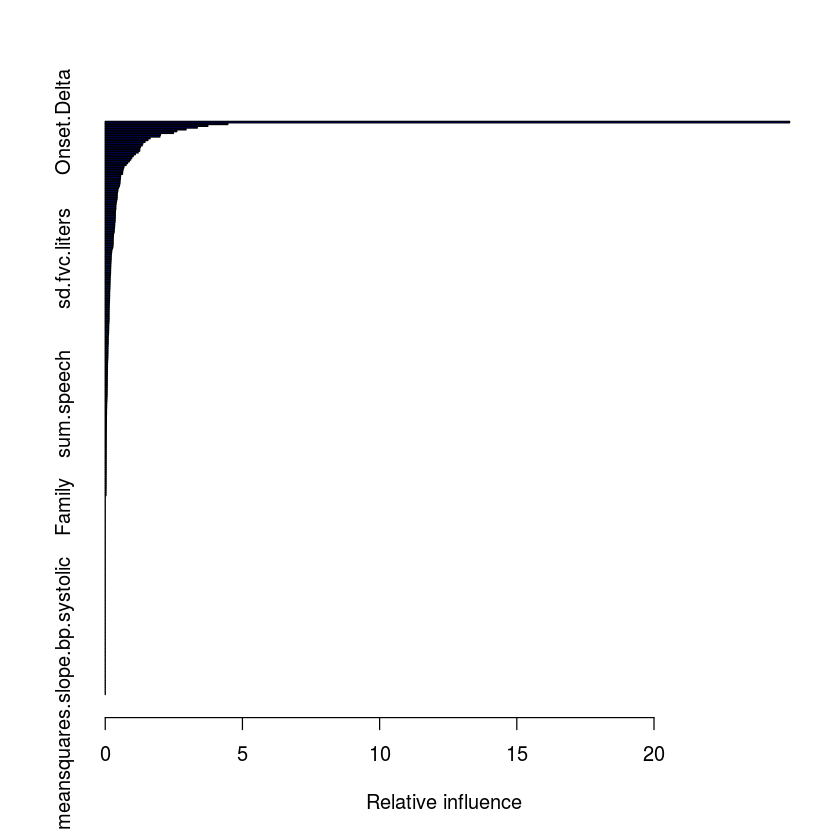

In [38]:
summary(gbm.model)

(h) Find the number of trees that minimizes the CV error. Plot the CV error vs. the number of trees, and indicate the minimizing number of trees in your plot.

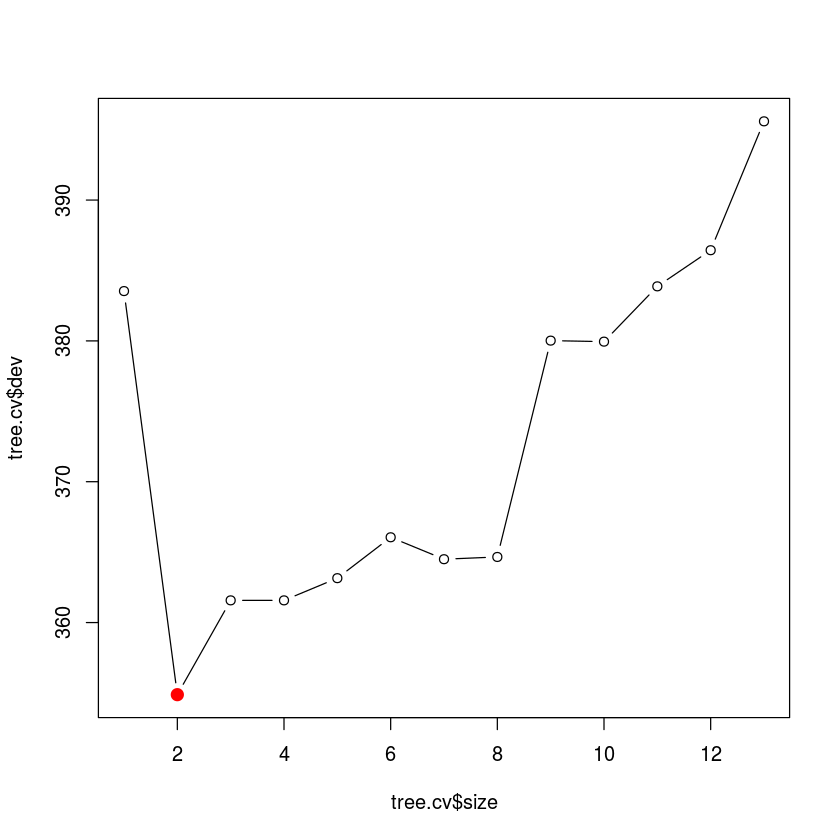

In [66]:
# set.seed(2017)
# tree.cv = cv.tree(full.tree.model)
plot(tree.cv$size, tree.cv$dev, type="b")
tree.min = which.min(tree.cv$dev)
points(tree.min-10, tree.cv$dev[tree.min], col="red", cex=2, pch=20)

(i) What is the test RMSE of this model?

In [69]:
set.seed(2017)
yhat.boost = predict(gbm.model, newdata=test.X, n.trees=1700)
sqrt(mean((yhat.boost-test.y)^2))

[1] 0.510713

(j) Finally, let us try using random forests. Set `set.seed(2017)` use the `randomForest` package to fit a random forest to the training data with parameters `mtry=80`, `importance=TRUE`. Plot the out-of-bag error versus the number of trees.

In [41]:
set.seed(2017)

rf.model = randomForest(train.y~., data=train.X, mtry=80, importance=TRUE)
rf.model


Call:
 randomForest(formula = train.y ~ ., data = train.X, mtry = 80,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 80

          Mean of squared residuals: 0.256321
                    % Var explained: 19.66

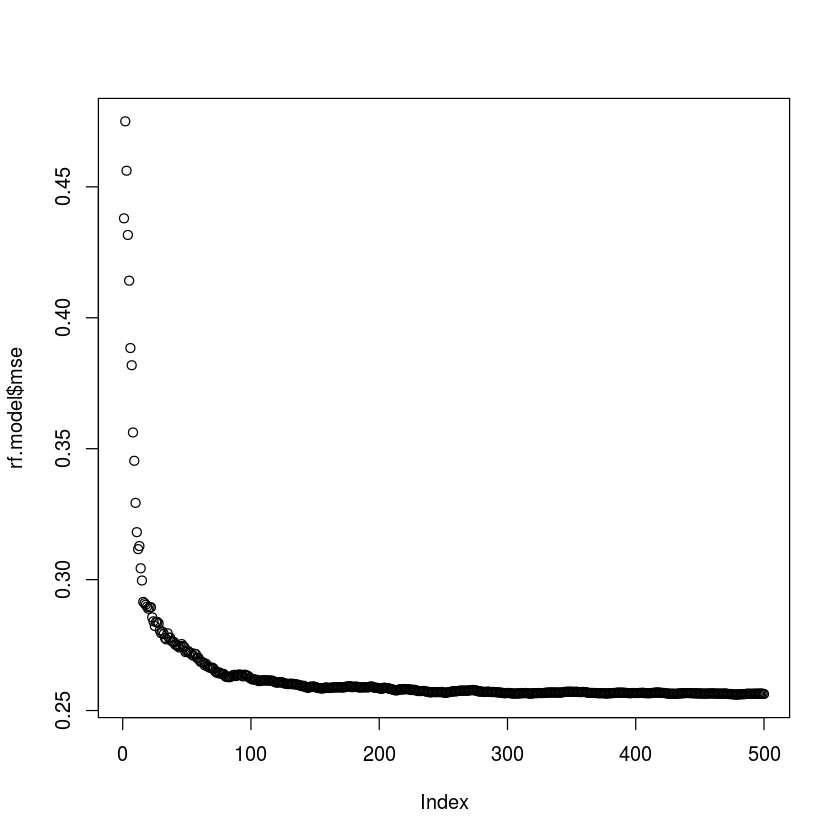

In [64]:
plot(rf.model$mse)

(k) Compute the test `RMSE` of this model. How does it compare to boosting and decision trees? Comment on these results.

In [65]:
# random forest
set.seed(2017)
yhat.rf = predict(rf.model, newdata=test.X)
sqrt(mean((yhat.rf-test.y)^2))

[1] 0.5126923

In [70]:
# boost
# yhat.boost = predict(gbm.model, newdata=test.X, n.trees=1700)
# sqrt(mean((yhat.boost-test.y)^2))
# 0.510712958209572

In [71]:
# (pruned) decision tree
# yhat.pruned = predict(full.tree.pruned, newdata=test.X)
# sqrt(mean((yhat.pruned-test.y)^2))
# 0.543212043340768

<span style="color:blue">
Gyu-Ho's Answer: Random forest method shows smaller `RMSE` than decision tree method with pruning, but slightly bigger than boosting, while boosting model is highly dependent on its parameters. Overall, all models show similar `RMSE`s. For interpretability, I would prefer boosting to random forests, because boosting tree grows and leanrs slows from previous trees, thus trees are often smaller. For visualization, I would prefer decision trees, which are very easy to understand.  
</span>